# Airline Passenger Satisfaction

In [122]:
import importlib
import random

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.plot_utils 
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plotutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForest

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

## Introduction

In this project we are using data about airline passengers and their satisfaction levels with their flying experience. The data set takes into account the distance flown, travel class, delays, etc. Using this data we classify whether a passenger was 'satisfied' or 'neutral or dissatisfied' with their expereince. 

By using stratified k-fold cross validation we found that the best classifier for this dataset was a decision tree, yielding a predictive accuracy of around 95%. 

# Data Analysis

### Data Attributes 
There are twenty-five total attributes in this data set: 
* **Gender:** Gender of the passengers (Female, Male)
* **Customer Type:** The customer type (Loyal customer, disloyal customer)
* **Age:** The actual age of the passengers
* **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)
* **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* **Flight distance:** The flight distance of this journey
* **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
* **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
* **Ease of Online booking:** Satisfaction level of online booking
* **Gate location:** Satisfaction level of Gate location
* **Food and drink:** Satisfaction level of Food and drink
* **Online boarding:** Satisfaction level of online boarding
* **Seat comfort:** Satisfaction level of Seat comfort
* **Inflight entertainment:** Satisfaction level of inflight entertainment
* **On-board service:** Satisfaction level of On-board service
* **Leg room service:** Satisfaction level of Leg room service
* **Baggage handling:** Satisfaction level of baggage handling
* **Check-in service:** Satisfaction level of Check-in service
* **Inflight service:** Satisfaction level of inflight service
* **Cleanliness:** Satisfaction level of Cleanliness
* **Departure Delay in Minutes:** Minutes delayed when departure
* **Arrival Delay in Minutes:** Minutes delayed when Arrival
* **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
    * This is the class label we aimed to predict

### Data Cleaning
While most of attributes are categorical, a few are not, including distance of flight and age. We converted these to categorical by computing 5 equal bins for each attribute and assigned each instance a label 1-5 depending on which bin they fell into. 

Next, after some exploratory data analysis, we trimmed down the number of attributes to the following columns:
* Gender
* Customer Type 
* Age
* Type of Travel 
* Class 
* Flight Distance

Doing so helped reduce overfitting of our decision tree and actually increased the predictive accuracy of the model.

We also took a random subsample of our data before performing the stratified k fold cross validation because of the nature of our dataset. It started with over 100,000 rows which we narrowed down to around 30,000 after removing rows with missing values. Then, we took a random subsample of 1,000 rows to train our models.

### Summary Stats
Some important statistics about our data are approximately 51% of the respondants were female and approximately 49% were male, a relatively equal distribution between male and female respondants. Furthermore, 82% were loyal customers and 18% were disloyal customers. The majority of passengers were flying for business purposes (69%) and less so for personal travel (31%). Overall we saw that 37% of customers were satisfied with their experience and 63% were neutral or dissatidfied. One area that we looked at more closely was the satisfaction based on the class the passenger was in. For economy passengers, 87.7% were neutral or dissatisfied and 12.3% were satisfied. For economy plus passengers, 83.4% were neutral or dissatisfied and 16.6% were satisfied. For business class passengers, 37% were neutral or dissatisfied and 63% were satisfied.

In [123]:
customerData = MyPyTable()
customerData.load_from_file('projectData/train.csv')
customerData.remove_rows_with_missing_values()


satisfaction = []
for row in customerData.data:
    satisfaction.append(row[-1])

# get rid of # and ID columns
newTable = []
for row in customerData.data:
    newTable.append(row[2:8])
customerData.data = newTable
customerData.column_names = customerData.column_names[2:8]
for i in range(len(customerData.data)):
    customerData.data[i].append(satisfaction[i])




## Categorizing Flight Distance

Splitting flight distance into five equal width bins, then placing each distance in a category 1-5.

In [124]:
distance = myutils.get_column(customerData.data, customerData.column_names, 'Flight Distance')
distCutoffs = myutils.compute_equal_width_cutoffs(distance, 5)
distBins = myutils.convert_cutoffs_to_bins(distCutoffs)
for i in range(len(customerData.data)):
    customerData.data[i][5] = myutils.convertBinToCategory(customerData.data[i][5], distBins)

## Categorizing Age

Splitting age into five equal width bins, then placing each age in a category 1-5.

In [125]:
age = myutils.get_column(customerData.data, customerData.column_names, 'Age')
ageCutoffs = myutils.compute_equal_width_cutoffs(age, 5)
ageBins = myutils.convert_cutoffs_to_bins(ageCutoffs)
for i in range(len(customerData.data)):
    customerData.data[i][2] = myutils.convertBinToCategory(customerData.data[i][2], ageBins)

# Exploratory Data Analysis

dissatisfied## Overall Satisfaction

First we looked at the overall percentage of customers who were satisfied/neutral or dissatisfied. Figure 1 shows that, overall, the slight majority of customers were either neutral or dissatisfied (roughly a two-third
 to one-third split). This acts as a sort of baseline for our classifiers later on. We would hope to see our predictive accuracy above 63.3%.

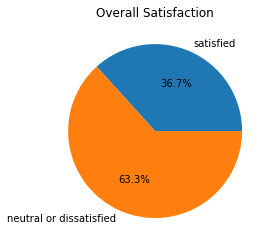

In [126]:
totSatisfied = 0

for val in satisfaction:
    if val == 'satisfied':
        totSatisfied += 1
plotutils.plot_pie_chart(['satisfied', 'neutral or dissatisfied'], [totSatisfied, len(satisfaction) - totSatisfied], 'Overall Satisfaction')

Figure 1. Overall percentage of satisfied and neutral/dissatisfied customers

## Gender and Customer Satisfaction

The following figures aim to discover any trends in male/female satisfaction. Figure 2 shows an almost even distribution of males and females, and figures 3 and 4 show us that male and female satisfaction levels are very similar.

In [127]:
genders = myutils.get_column(customerData.data, customerData.column_names, 'Gender')

totalMale = 0
totalFemale = 0
maleCount = 0
femaleCount = 0

for i in range(len(customerData.data)):
    if customerData.data[i][0] == 'Male':
        totalMale += 1
        if satisfaction[i] == 'satisfied':
            maleCount += 1
    if customerData.data[i][0] == 'Female':
        totalFemale += 1
        if satisfaction[i] == 'satisfied':
            femaleCount += 1

### Gender Distribution

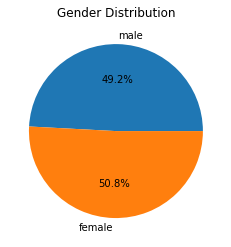

In [128]:
plotutils.plot_pie_chart(['male', 'female'], [totalMale, totalFemale], 'Gender Distribution')

Figure 2. Breakdown of gender distribution in the dataset, roughly a fifty-fifty split.

### Male Flight Satisfaction

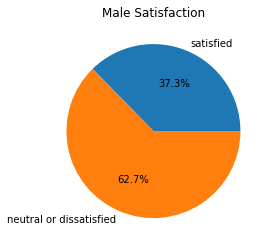

In [129]:
plotutils.plot_pie_chart(['satisfied', 'neutral or dissatisfied'], [maleCount, totalMale - maleCount], 'Male Satisfaction')


Figure 3. Satisfaction for male customers

### Female Flight Satisfaction

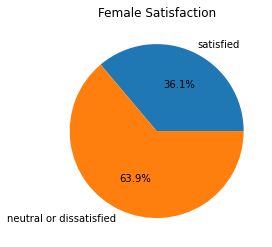

In [130]:
plotutils.plot_pie_chart(['satisfied', 'neutral or dissatisfied'], [femaleCount, totalFemale - femaleCount], 'Female Satisfaction')

Figure 4. Satisfaction of female customers

## Airplane Class and Satisfaction

We can see the overwhelming majority of customers flying in economy and economy plus fall into the neutral or dissatisfied class, while the majority of business class customers were satisfied with their flight. This gives us some information that 'Class' will probably have a strong effect on the classification of an unseen instance, i.e. if the unseen instance was a customer in business class, we might expect they fall into the 'satisfied' category.

In [131]:
classes = myutils.get_column(customerData.data, customerData.column_names, 'Class')

totalEco = 0
totalEcoPlus = 0
totalBusiness = 0
ecoCount = 0
plusCount = 0
businessCount = 0

for i in range(len(customerData.data)):
    if customerData.data[i][4] == 'Eco':
        totalEco+= 1
        if satisfaction[i] == 'satisfied':
            ecoCount += 1
    if customerData.data[i][4] == 'Eco Plus':
        totalEcoPlus+= 1
        if satisfaction[i] == 'satisfied':
            plusCount += 1
    if customerData.data[i][4] == 'Business':
        totalBusiness += 1
        if satisfaction[i] == 'satisfied':
            businessCount += 1

## Economy Satisfaction

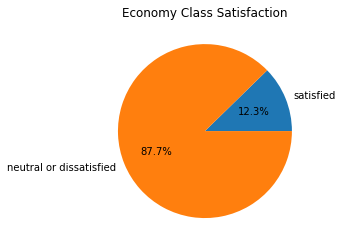

In [132]:
plotutils.plot_pie_chart(['satisfied', 'neutral or dissatisfied'], [ecoCount, totalEco - ecoCount], 'Economy Class Satisfaction')

Figure 5. Satisfaction of customers sitting in economy class

## Economy Plus Satisfaction

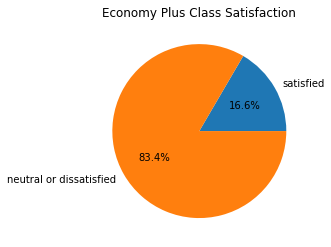

In [133]:
plotutils.plot_pie_chart(['satisfied', 'neutral or dissatisfied'], [plusCount, totalEcoPlus - plusCount], 'Economy Plus Class Satisfaction')

Figure 6. Satisfaction of customers sitting in economy plus class

## Business Satisfaction

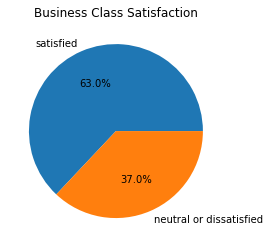

In [134]:
plotutils.plot_pie_chart(['satisfied', 'neutral or dissatisfied'], [businessCount, totalBusiness - businessCount], 'Business Class Satisfaction')

Figure 7. Satisfaction of customers sitting in business class

## Random Subsampling

Our dataset was extremely large (over 30,000 rows after removing rows with missing values), so we randomly sampled 1,000 rows from those ~30,000.

In [135]:
indices = list(range(len(customerData.data)))
random.shuffle(indices)
subset = indices[0:1000]

newTable = []
for ind in subset:
    newTable.append(customerData.data[ind])
customerData.data = newTable

satisfaction = []
for row in customerData.data:
    satisfaction.append(row.pop())


## Decision Tree Classifier

The decision tree classifier creates a decision tree using the top down induction of decision trees method, splitting attributes based on entropy. Performance was evaluated using predictive accuracy (number of total correct classifications divided by total number of predictions). Training and testing sets were generated using stratified k fold cross validation.

In [136]:
k = 10

xTrainInd, xTestInd = myevaluation.stratified_kfold_cross_validation(customerData.data, satisfaction, k)

allDTPred = []
allDTTrue = []
allStratAccuracies = []
for i in range(k):
    xTrain = []
    yTrain = []
    xTest = []
    yTest = []
    
    satTree = MyDecisionTreeClassifier()
    for val in xTrainInd[i]:
        xTrain.append(customerData.data[int(val)])
        yTrain.append(satisfaction[int(val)])

    for val in xTestInd[i]:
        xTest.append(customerData.data[int(val)])
        yTest.append(satisfaction[int(val)])
    satTree.fit(xTrain, yTrain)
    
    predictions = satTree.predict(xTest)
    
    count = 0

    for i in range(len(predictions)):
        allDTPred.append(predictions[i])
        allDTTrue.append(yTest[i])
        if predictions[i] == yTest[i]:
            count += 1
    accuracy = count / len(predictions)
    allStratAccuracies.append(accuracy)

stratKFoldAcc = round(sum(allStratAccuracies) / len(allStratAccuracies), 3)

    


['Attribute', 'att4', ['Value', 'Business', ['Attribute', 'att3', ['Value', 'Business travel', ['Attribute', 'att1', ['Value', 'Loyal Customer', ['Attribute', 'att2', ['Value', 1, ['Leaf', 'neutral or dissatisfied', 11, 16]], ['Value', 2, ['Attribute', 'att5', ['Value', 1, ['Attribute', 'att0', ['Value', 'Female', ['Leaf', 'satisfied', 12, 20]], ['Value', 'Male', ['Leaf', 'satisfied', 13, 20]]]], ['Value', 2, ['Attribute', 'att0', ['Value', 'Female', ['Leaf', 'satisfied', 11, 19]], ['Value', 'Male', ['Leaf', 'neutral or dissatisfied', 7, 13]]]], ['Value', 3, ['Attribute', 'att0', ['Value', 'Female', ['Leaf', 'neutral or dissatisfied', 7, 13]], ['Value', 'Male', ['Leaf', 'neutral or dissatisfied', 4, 6]]]], ['Value', 4, ['Attribute', 'att0', ['Value', 'Female', ['Leaf', 'satisfied', 10, 15]], ['Value', 'Male', ['Leaf', 'satisfied', 9, 11]]]], ['Value', 5, ['Leaf', 'satisfied', 1, 118]]]], ['Value', 3, ['Attribute', 'att5', ['Value', 1, ['Attribute', 'att0', ['Value', 'Female', ['Leaf', 

In [137]:
print("Decision Tree Predictive Accuracy:", stratKFoldAcc)

Decision Tree Predictive Accuracy: 0.908


## Confusion Matrix

In [138]:
from tabulate import tabulate
importlib.reload(mysklearn.myutils)

header = ['Satisfaction', 'satisfied', 'neutral or dissatisfied', 'Total', 'Recognition(%)']
categories = ['satisfied', 'neutral or dissatisfied']


print("Decision Tree Confusion Matrix (Stratified 10-Fold Cross Validation")
print()
dt = myutils.confusionCategorical(allDTTrue, allDTPred, header, categories)
dt.pretty_print()

Decision Tree Confusion Matrix (Stratified 10-Fold Cross Validation

Satisfaction               satisfied    neutral or dissatisfied    Total    Recognition(%)
-----------------------  -----------  -------------------------  -------  ----------------
satisfied                        804                         92      896             89.73
neutral or dissatisfied            0                        104      104            100



# Random Forest Classifier

This random forest classifier utilizes the decision tree classifier used above to create N trees and select the best M trees from the N trees. "Best" refers to the M trees with the highest predictive accuracy. F is the number of attributes available to split on when constructing each tdidt. The predictive accuracy of each value of F for each change of the parameters N and M is listed below.

## N = 10, M = 5, F = 2-5

In [139]:

for F in range(2, len(customerData.column_names)):
    testSet = []
    randomForest = MyRandomForest()
    testSet = randomForest.fit(customerData.data, satisfaction, 10, 5, F)
    
    yTest = []
    for i in range(len(testSet)):
        yTest.append(testSet[i].pop())

    predictions = randomForest.predict(testSet)

    print("Predictive Accuracy with F =", F, ":", round(myutils.determineAccuracy(predictions, yTest), 3))

Predictive Accuracy with F = 2 : 0.764
Predictive Accuracy with F = 3 : 0.785
Predictive Accuracy with F = 4 : 0.83
Predictive Accuracy with F = 5 : 0.824


## N = 20, M = 10, F = 2-5

In [140]:
for F in range(2, len(customerData.column_names)):
    testSet = []
    randomForest = MyRandomForest()
    testSet = randomForest.fit(customerData.data, satisfaction, 20, 10, F)
    
    yTest = []
    for i in range(len(testSet)):
        yTest.append(testSet[i].pop())

    predictions = randomForest.predict(testSet)

    print("Predictive Accuracy with F =", F, ":", round(myutils.determineAccuracy(predictions, yTest), 3))

Predictive Accuracy with F = 2 : 0.733
Predictive Accuracy with F = 3 : 0.791
Predictive Accuracy with F = 4 : 0.788
Predictive Accuracy with F = 5 : 0.815


## N = 50, M = 10, F = 2-5

In [141]:
for F in range(2, len(customerData.column_names)):
    testSet = []
    randomForest = MyRandomForest()
    testSet = randomForest.fit(customerData.data, satisfaction, 50, 10, F)
    
    yTest = []
    for i in range(len(testSet)):
        yTest.append(testSet[i].pop())

    predictions = randomForest.predict(testSet)

    print("Predictive Accuracy with F =", F, ":", round(myutils.determineAccuracy(predictions, yTest), 3))

Predictive Accuracy with F = 2 : 0.706
Predictive Accuracy with F = 3 : 0.8
Predictive Accuracy with F = 4 : 0.824
Predictive Accuracy with F = 5 : 0.818


## Results

Overall, the random forest classifier gives us a predictive accuracy that hovers around 80%. This is above our baseline predictive accuracy of ~63%, so we gain information from this model, but the decision tree outperforms it.

## Naive Bayes Classifier

The naive bayes classifier uses, as it name implies, the naive bayes algorithm to classify unseen instances.

In [142]:
k = 10

xTrainIndices, xTestIndices = myevaluation.stratified_kfold_cross_validation(customerData.data, satisfaction, k)

allStratAccuraciesNB = []
allNBPred = []
allNBTrue = []

for i in range(k):
    satNB = MyNaiveBayesClassifier()
    xTrain = []
    yTrain = []
    xTest = []
    yTest = []

    for val in xTrainIndices[i]:
        xTrain.append(customerData.data[int(val)])
        yTrain.append(satisfaction[int(val)])
    for val in xTestIndices[i]:
        xTest.append(customerData.data[int(val)])
        yTest.append(satisfaction[int(val)])
    satNB.fit(xTrain, yTrain)
    predictions = satNB.predict(xTest)

    count = 0

    for i in range(len(predictions)):
        allNBPred.append(predictions[i])
        allNBTrue.append(yTest[i])
        if predictions[i] == yTest[i]:
            count += 1
    accuracy = count / len(predictions)
    allStratAccuraciesNB.append(accuracy)

stratKFoldAcc = round(sum(allStratAccuraciesNB) / len(allStratAccuraciesNB), 3)
print("Predictive Accuracy", stratKFoldAcc)

Predictive Accuracy 0.693


In [143]:
from tabulate import tabulate
importlib.reload(mysklearn.myutils)

header = ['Satisfaction', 'satisfied', 'neutral or dissatisfied', 'Total', 'Recognition(%)']
categories = ['satisfied', 'neutral or dissatisfied']


print("Decision Tree Confusion Matrix (Stratified 10-Fold Cross Validation")
print()
dt = myutils.confusionCategorical(allNBTrue, allNBPred, header, categories)
dt.pretty_print()

Decision Tree Confusion Matrix (Stratified 10-Fold Cross Validation

Satisfaction               satisfied    neutral or dissatisfied    Total    Recognition(%)
-----------------------  -----------  -------------------------  -------  ----------------
satisfied                          3                         92       95              3.16
neutral or dissatisfied          215                        690      905             76.24



## Results

We see that both the random forest and decision tree classifiers outperform the naive bayes classifier and that this classifier has a high rate of classifying false negatives as well as false positives ~25% of the time.

## Heroku Link

https://airline-satisfaction-app.herokuapp.com/predict?att0=Female&att1=Loyal+Customer&att2=1&att3=Business+travel&att4=Business&att5=1

Possible Attribute Values:
- att0: Male, Female 
- att1: Loyal Customer, disloyal Customer 
- att2: 1, 2, 3, 4, 5
- att3: Business Travel, Personal Travel
- att4: Business, Eco Plus, Eco
- att5: 1, 2, 3, 4, 5

## Overall Results of Classification

Out of the three classifiers, using k fold stratified cross validation for each, the decision tree's predictive accuracy consistently outperformed that of the random forest and naive bayes classifiers. The decision tree only had a ~10% false negative rate (classifying as neutral or dissatisfied when true value was satisfied) and had a 0% false positive rate (classifying at satisfied when true value was neutral or satisfied).

Some ways we could possibly improve our classification is to experiment with more combinations of attributes. There are a large number of combinations, so we picked only a small subset that we found to give us a high predictive accuracy. More exploratory data analysis might result in finding better combinations.

Our biggest issue in implementing the classifiers was the size of our dataset and the number of attributes. We tried building our models with larger numbers of samples, but our local computers were extremely slow, even with something like 5,000 rows in the training set. The issue with the number of attributes in the dataset (25 in total) was that we were overfitting our trees (as well as it took a long time to run the code). Attribute selection narrowed the dataset down to six attributes, and we didn't sacrifice predictive accuracy.